<a href="https://colab.research.google.com/github/Sgewux/ml_from_scratch/blob/master/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required libraries for math, data manipulation and plotting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Implementing the model

In [ ]:
class LinearRegressor(object):
  
  def __init__(self, learning_rate=0.01):
    self.learning_rate = learning_rate
    self.b = None
    self.m = None
  
  def fit(self, x, y):
    self.b = 1
    self.m = 1
 
    #Gradient descent
    for _ in range(1000):
 
      #Partial derivate of E in respect to B (the mean squared error function)
      de_db = np.mean((-2 * (y - (self.m * x + self.b))))
      #partial derivate of E in respect to M
      de_dm = np.mean(-2 * ((y - (self.m * x + self.b))*x))
 
      gradient = np.array([de_db, de_dm])
 
      self.b, self.m = np.array([self.b, self.m]) - (self.learning_rate * gradient)
    
    print(f'MODEL TRAINED B = {self.b}  M = {self.m}  LAST GRADIENT = {gradient}')
 
  def predict(self, x):
    if self.b and self.m:
      return self.m * x + self.b
    else:
      raise Exception('You cant make preditions before training the model')
 
  def mse(self, true_x, true_y):
    return np.mean((true_y - self.predict(true_x))**2)

#Training our model and using it to make predictions

- I will train diferent models with diferent real word datasets.
- I will use the trained model to make predictions. 
- For each dataset i will do an scatterplot with the regression line.


#Iris setosa

Dataset link = https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr10.html

Task: Predict the sepal lenght given the sepal width.

In [ ]:
iris_setosa_df = pd.read_excel('/content/slr10.xls')
iris_setosa_df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


MODEL TRAINED B = 1.2772297874274456  M = 1.0835830524528913  LAST GRADIENT = [-0.02131383  0.00609408]
MSE = 0.18398000712395157


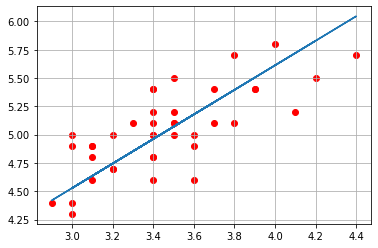

,Real,Predicted
0,4.5,3.769471
1,4.4,4.744696
2,5.0,5.069770
3,5.1,5.394845
4,4.8,4.527979
5,4.6,5.394845
6,5.3,5.286487
7,5.0,4.853054


In [ ]:
sepal_width = iris_setosa_df['X'].values
sepal_lenght = iris_setosa_df['Y'].values

x_train = sepal_width[:40]
y_train = sepal_lenght[:40]
x_test = sepal_width[40:]
y_test = sepal_lenght[40:]


model = LinearRegressor()
model.fit(x_train, y_train)
print(f'MSE = {model.mse(x_test, y_test)}')

real_vs_predicted = pd.DataFrame({'Real' : y_test, 'Predicted': model.predict(x_test)})

fig, ax = plt.subplots()
ax.grid()
plt.scatter(x_train, y_train, c=['red'])
plt.plot(x_train, model.predict(x_train))
plt.show()

real_vs_predicted


#Student performance

Task: Predict the writing score given the reading score.

In [ ]:
student_performance_df = pd.read_csv('/content/studentsperformance_15085fee-8bc7-4d33-a182-655428728fe1.csv')
student_performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


MODEL TRAINED B = 0.9844514123813248  M = 0.9693993221870256  LAST GRADIENT = [ 0.15057893 -0.00208773]
MSE = 21.663702830043295


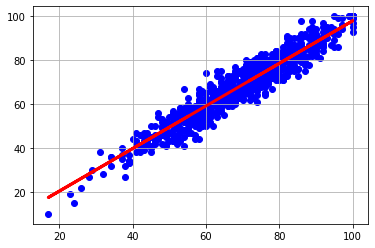

,Real,Predicted
0,68,71.750602
1,73,78.536397
2,95,92.107988
3,87,83.383394
4,78,74.658800
5,74,79.505797
6,75,72.720001
7,40,44.607421
8,69,73.689401
9,51,53.332015


In [ ]:
reading_score_data = student_performance_df['reading score'].values
writing_score_data = student_performance_df['writing score'].values

x_train = reading_score_data[:800]
y_train = writing_score_data[:800]
x_test = reading_score_data[800:]
y_test = writing_score_data[800:]

model = LinearRegressor(learning_rate=0.0001)
model.fit(x_train, y_train)
print(f'MSE = {model.mse(x_test, y_test)}')

real_vs_predicted = pd.DataFrame({'Real': y_test, 'Predicted': model.predict(x_test)})

fig, ax = plt.subplots()
plt.grid()
plt.scatter(x_train, y_train, c=['blue'])
plt.plot(x_train, model.predict(x_train), color='red', linewidth=3)
plt.show()

real_vs_predicted.head(10)

#Weather conditions during WWII

Dataset link = https://www.kaggle.com/smid80/weatherww2/data

Task: Predict the max temperature given the min temperature.

In [ ]:
world_ward_df = pd.read_csv('/content/summary_of_weather.csv')
world_ward_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MODEL TRAINED B = 1.0663494918260776  M = 1.3099190603970585  LAST GRADIENT = [-0.05229371  0.00231824]
MSE = 3.1643698872507713


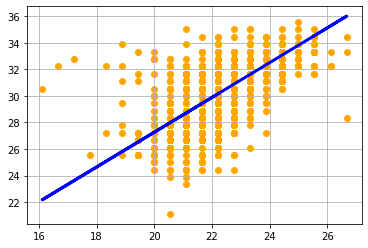

,Real,Predicted
0,33.333333,33.086593
1,33.333333,29.447929
2,34.444444,30.903395
3,33.333333,35.269792
4,32.222222,31.631128
5,35.000000,32.358860
6,33.333333,32.358860
7,33.888889,31.631128
8,34.444444,33.814326
9,34.444444,34.542059


In [ ]:
min_temp_data = world_ward_df['MinTemp'].values
max_temp_data = world_ward_df['MaxTemp'].values

x_train = min_temp_data[:1000]
y_train = max_temp_data[:1000]
x_test = min_temp_data[1000:1100]
y_test = max_temp_data[1000:1100]

model = LinearRegressor(learning_rate=0.001)
model.fit(x_train, y_train)
print(f'MSE = {model.mse(x_test, y_test)}')

real_vs_predicted = pd.DataFrame({'Real': y_test, 'Predicted': model.predict(x_test)})
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x_train, y_train, c=['orange'])
plt.plot(x_train, model.predict(x_train), linewidth=3, color='blue')
plt.show()

real_vs_predicted.head(15)